# **Project Name**    -  Nested Time Series Cross Validation for Grouped Forecasting



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Implement nested cross validation for time series.** 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

In [2]:
# Load Dataset
data= pd.read_csv("C:\\Users\\rajiv\\Downloads\\archive (1)\\train.csv")

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [4]:
data["date"]= pd.to_datetime(data["date"])

In [5]:
# First And Last Date-
print(f"Starting Date: {data['date'].min()}")
print(f"Last date: {data['date'].max()}")

Starting Date: 2012-01-31 00:00:00
Last date: 2017-12-31 00:00:00


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(7560, 12)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   6465 non-null   object        
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 708.9+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

1079

In [9]:
duplicates = data[data.duplicated()]
print("Duplicate rows:")
print(duplicates)


Duplicate rows:
      id date city  lat  long  pop shop brand container capacity  price  \
6481 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6482 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6483 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6484 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6485 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
...   ..  ...  ...  ...   ...  ...  ...   ...       ...      ...    ...   
7555 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
7556 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
7557 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
7558 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
7559 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   

      quantity  
6481       NaN  
6482       NaN  
6483       NaN  
6484       NaN 

In [10]:
# Droping Duplicates
data= data.drop_duplicates()

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

id            1
date          1
city          1
lat          52
long         47
pop           1
shop          1
brand         1
container    17
capacity     16
price         1
quantity      1
dtype: int64

In [12]:
nun= data[data.isnull()]
print("Nun values")
print(nun)

Duplicate rows:
      id date city  lat  long  pop shop brand container capacity  price  \
0    NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
1    NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
2    NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
3    NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
4    NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
...   ..  ...  ...  ...   ...  ...  ...   ...       ...      ...    ...   
6476 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6477 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6478 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6479 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   
6480 NaN  NaT  NaN  NaN   NaN  NaN  NaN   NaN       NaN      NaN    NaN   

      quantity  
0          NaN  
1          NaN  
2          NaN  
3          NaN 

In [13]:
# Looking for missing percentage
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent.round(2)

id           0.02
date         0.02
city         0.02
lat          0.80
long         0.73
pop          0.02
shop         0.02
brand        0.02
container    0.26
capacity     0.25
price        0.02
quantity     0.02
dtype: float64

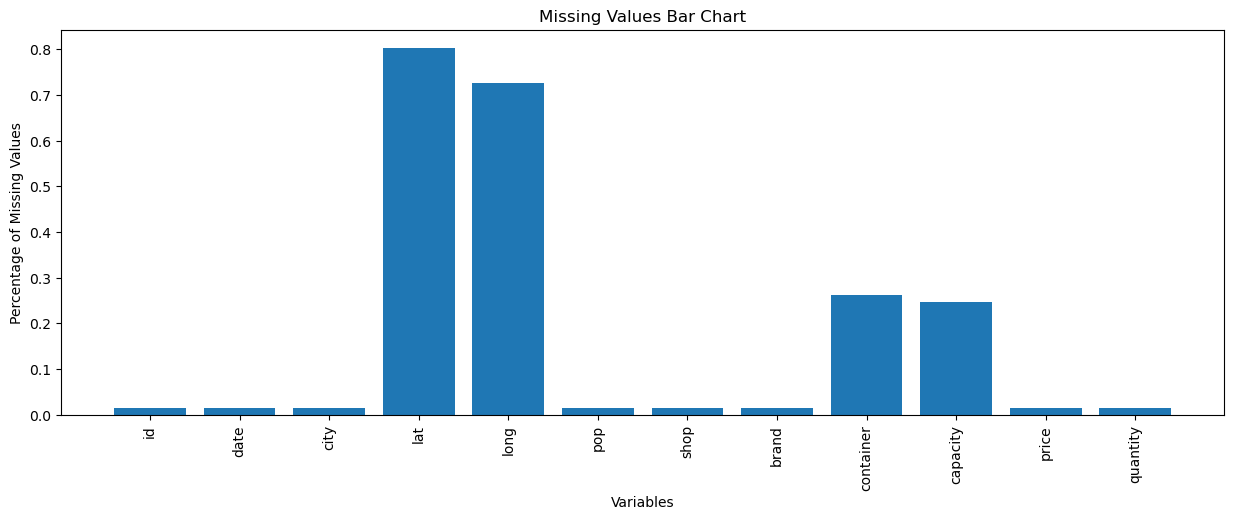

In [14]:
# Visualizing the missing values
# Bar Chart
plt.figure(figsize=(15, 5))
plt.bar(missing_percent.index, missing_percent)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Bar Chart')
plt.show()

The barplot reveals that latitude, longitude, container, and capacity exhibit a significant number of null values.

In [15]:
data=data.dropna()

In [16]:
data.isnull().sum()

id           0
date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [17]:
# Dataset Columns
data.columns

Index(['id', 'date', 'city', 'lat', 'long', 'pop', 'shop', 'brand',
       'container', 'capacity', 'price', 'quantity'],
      dtype='object')

In [18]:
# Dataset Describe
data.describe().round(2)

,id,lat,long,pop,price,quantity
count,6376.00,6376.00,6376.00,6376.00,6376.00,6376.00
mean,3237.04,38.30,23.27,354987.27,1.19,29416.48
std,1870.31,1.65,1.09,232713.31,0.82,17891.26
min,0.00,35.33,21.73,134219.00,0.11,2953.00
25%,1616.75,37.96,22.42,141732.00,0.61,16439.75
50%,3232.50,38.24,22.93,257501.50,0.92,25180.00
75%,4854.25,39.64,23.72,665871.00,1.50,37804.00
max,6479.00,40.64,25.14,672130.00,4.54,145287.00


In [19]:
data[["pop",'price', 'quantity']].skew()

pop         0.457008
price       1.354280
quantity    1.502794
dtype: float64

In [20]:
data[["pop","price", 'quantity']].kurtosis()

pop        -1.586726
price       1.239708
quantity    3.339978
dtype: float64

### Check Unique Values for each variable.

In [68]:
# Looking for dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6479
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        6376 non-null   int64  
 1   lat         6376 non-null   float64
 2   long        6376 non-null   float64
 3   pop         6376 non-null   Int64  
 4   shop        6376 non-null   int64  
 5   brand       6376 non-null   int64  
 6   container   6376 non-null   int64  
 7   capacity    6376 non-null   int64  
 8   price       6376 non-null   float64
 9   quantity    6376 non-null   Int64  
 10  Year        6376 non-null   int64  
 11  Month       6376 non-null   int64  
 12  DayOfMonth  6376 non-null   int64  
dtypes: Int64(2), float64(3), int64(8)
memory usage: 709.8 KB


In [22]:
# Check Unique Values for each variable.
data["city"].value_counts()

Athens          2122
Thessaloniki    1066
Patra           1065
Larisa          1062
Irakleion       1061
Name: city, dtype: int64

In [23]:
data["shop"].value_counts()

shop_4    1066
shop_6    1065
shop_5    1062
shop_1    1061
shop_2    1061
shop_3    1061
Name: shop, dtype: int64

In [24]:
data["brand"].value_counts()

kinder-cola     1279
adult-cola      1277
lemon-boost     1277
gazoza          1275
orange-power    1268
Name: brand, dtype: int64

In [25]:
data["container"].value_counts()

glass      2126
plastic    2125
can        2125
Name: container, dtype: int64

In [26]:
data["capacity"].value_counts()

500ml    2126
1.5lt    2125
330ml    2125
Name: capacity, dtype: int64

### Data Wrangling 

In [28]:
# Create Year, Month, DateofMonth Column
data["Year"]=data["date"].dt.year
data["Month"]=data["date"].dt.month
data["DayOfMonth"]=data["date"].dt.day

In [29]:
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,Year,Month,DayOfMonth
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,2012,1,31
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,2012,1,31
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,2012,1,31
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,2012,1,31
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,2012,1,31


In [30]:
# Droping ID column
data=data.drop("id", axis=1)

In [31]:
data.head(2)

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,Year,Month,DayOfMonth
0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,2012,1,31
1,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,2012,1,31


In [32]:
data["lat"]=data["lat"].round(2)
data["long"]=data["long"].round(2)
data["pop"]=data["pop"].convert_dtypes(int)
data["quantity"]=data["quantity"].convert_dtypes(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6479
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6376 non-null   datetime64[ns]
 1   city        6376 non-null   object        
 2   lat         6376 non-null   float64       
 3   long        6376 non-null   float64       
 4   pop         6376 non-null   Int64         
 5   shop        6376 non-null   object        
 6   brand       6376 non-null   object        
 7   container   6376 non-null   object        
 8   capacity    6376 non-null   object        
 9   price       6376 non-null   float64       
 10  quantity    6376 non-null   Int64         
 11  Year        6376 non-null   int64         
 12  Month       6376 non-null   int64         
 13  DayOfMonth  6376 non-null   int64         
dtypes: Int64(2), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 759.6+ KB


## ***Data Vizualization***

#### Chart - 1

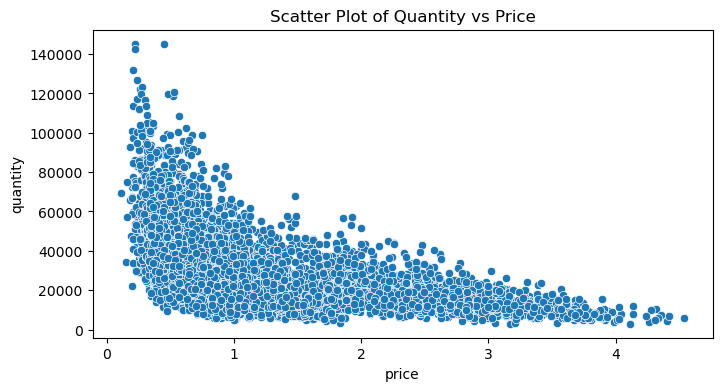

In [34]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 4))
sns.scatterplot(x='price', y='quantity', data=data)
plt.title('Scatter Plot of Quantity vs Price')
plt.show()

Chosen to examine if there's a noticeable relationship between the price of a product and the quantity sold.

#### Chart - 2

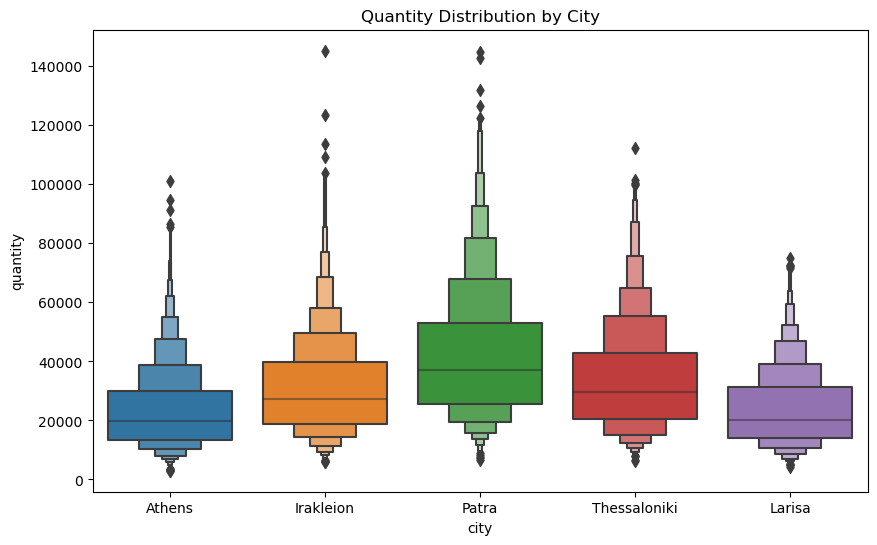

In [35]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
sns.boxenplot(x="city", y="quantity", data=data)
plt.title('Quantity Distribution by City')
plt.show()

Selected to understand how quantity varies across different cities, providing a detailed distribution view

#### Chart - 3

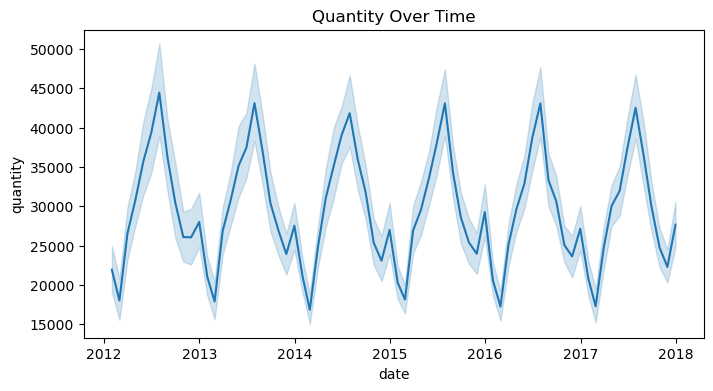

In [36]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 4))
sns.lineplot(x='date', y='quantity', data=data)
plt.title('Quantity Over Time')
plt.show()

Useful for tracking trends over time, vital for understanding sales patterns

#### Chart - 4

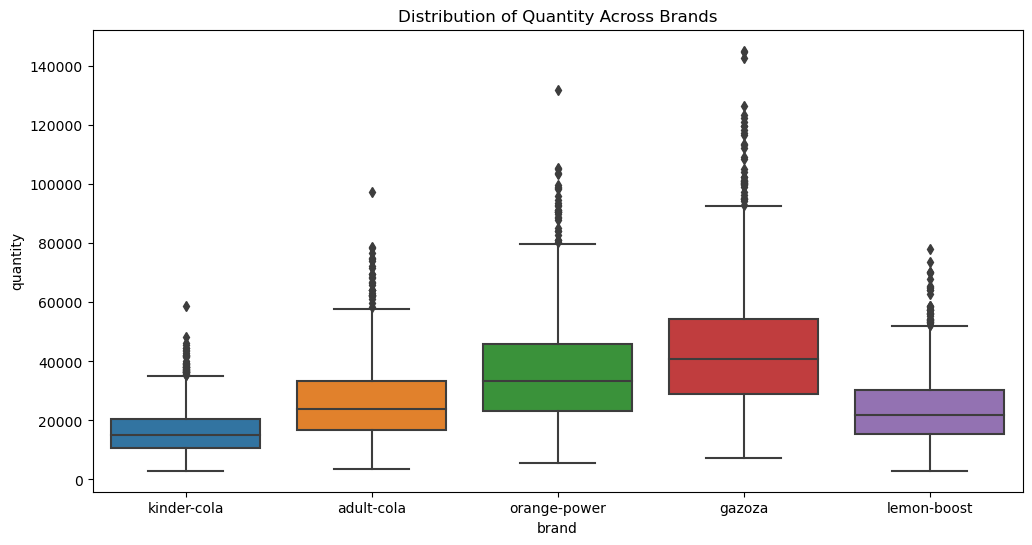

In [37]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='quantity', data=data)
plt.title('Distribution of Quantity Across Brands')
plt.show()

Helps compare quantity distribution among different brands.

#### Chart - 5

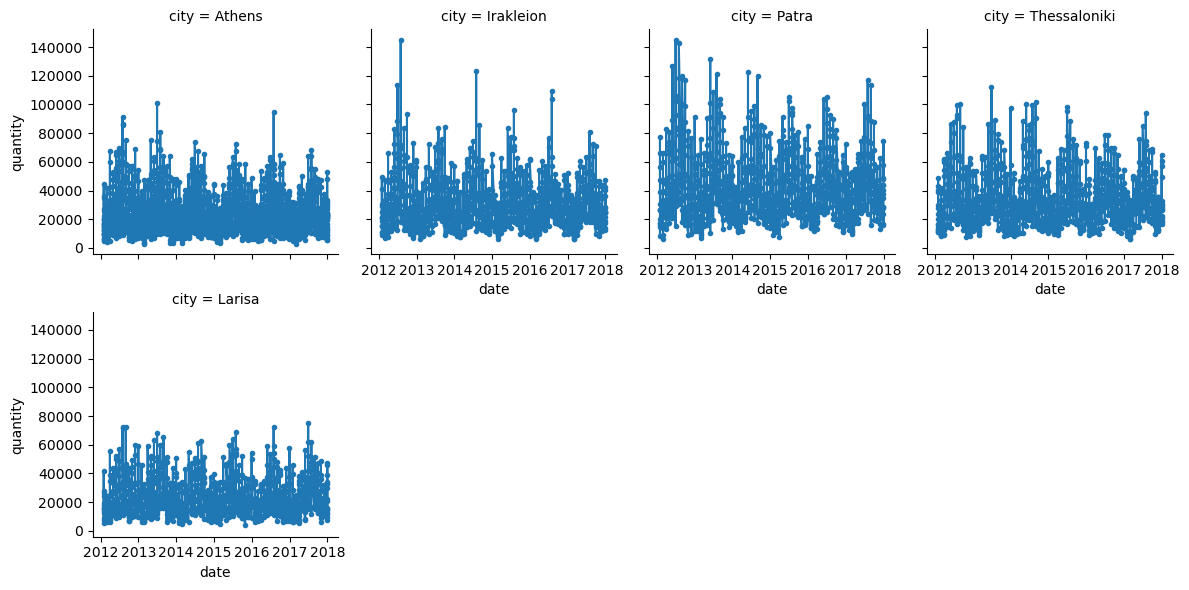

In [38]:
# Chart - 5 visualization code
g = sns.FacetGrid(data, col="city", col_wrap=4, height=3)
g = g.map(plt.plot, "date", "quantity", marker=".")

Enables observation of quantity trends in each city separately.

#### Chart - 6

In [39]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [40]:
# Chart - 6 visualization code
import folium
from folium.plugins import HeatMap

m = folium.Map([data['lat'].mean(), data['long'].mean()], zoom_start=5)
HeatMap(data=data[['lat', 'long', 'quantity']].groupby(['lat', 'long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)
m

 Provides a visual summary of quantity distribution across brands and cities.

#### Chart - 7

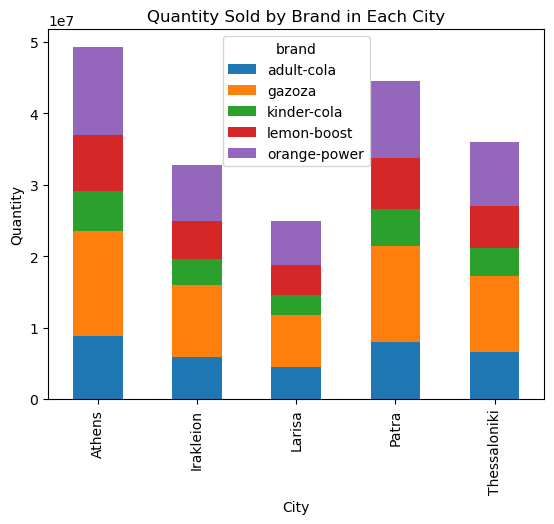

In [41]:
# Chart - 7 visualization code
data.groupby(['city', 'brand'])['quantity'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Quantity Sold by Brand in Each City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()


Provides a visual summary of quantity distribution across brands and cities.

#### Chart - 8

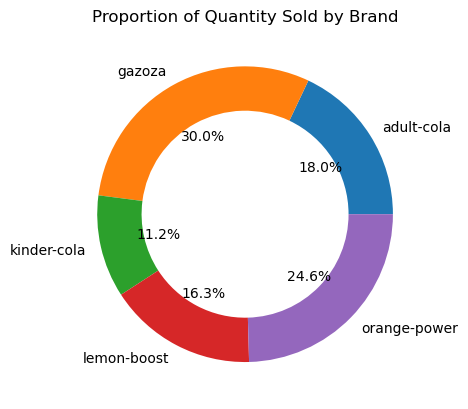

In [42]:
# Chart - 8 visualization code
data.groupby('brand')['quantity'].sum().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Proportion of Quantity Sold by Brand')
plt.ylabel('')  # hide the y-axis label
plt.show()


Illustrates the proportion of total quantity sold by each brand.

#### Chart - 9

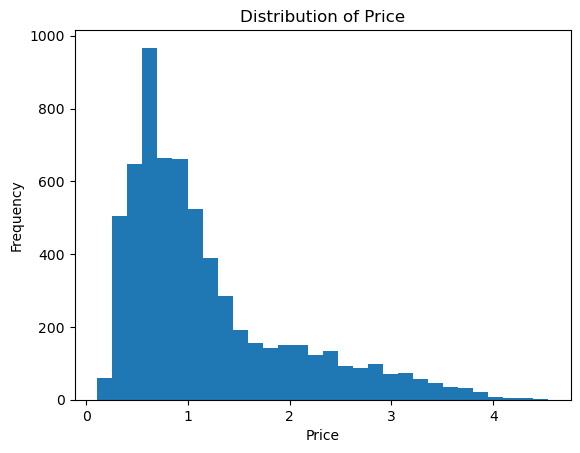

In [43]:
# Chart - 9 visualization code
data['price'].plot(kind='hist', bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()


Displays the distribution of prices.

#### Chart - 10

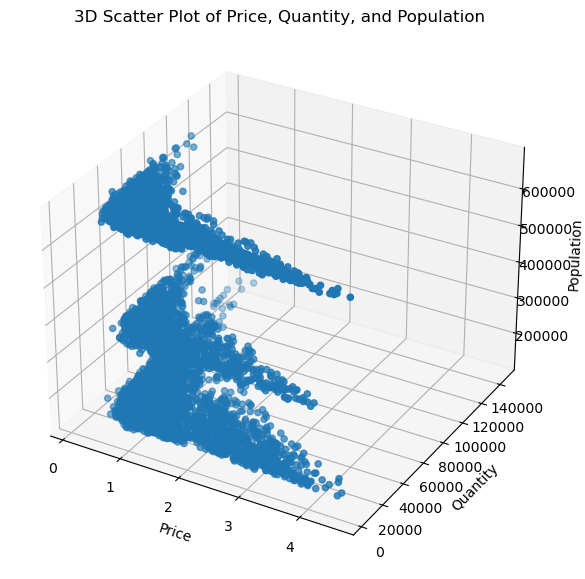

In [44]:
# Chart - 10 visualization code
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = data['price']
y = data['quantity']
z = data['pop']

ax.scatter(x, y, z)

ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Population')

plt.title('3D Scatter Plot of Price, Quantity, and Population')
plt.show()


Visualizes relationships between price, quantity, and population in a three-dimensional space.

#### Chart - 11

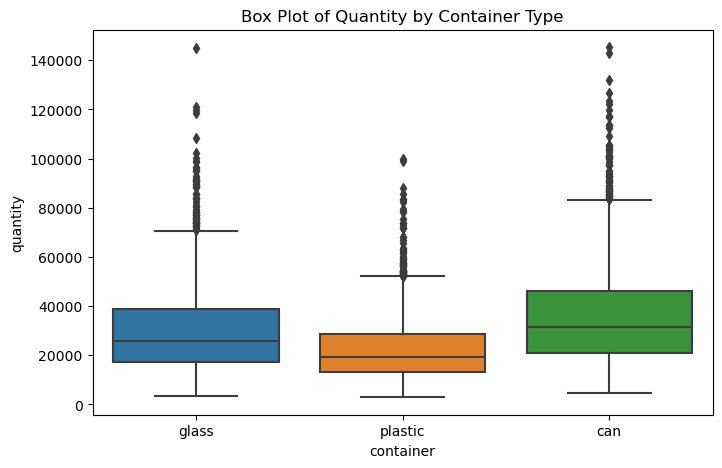

In [45]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 5))
sns.boxplot(x='container', y='quantity', data=data)
plt.title('Box Plot of Quantity by Container Type')
plt.show()


Highlights variations in quantity based on container types.

#### Chart - 12

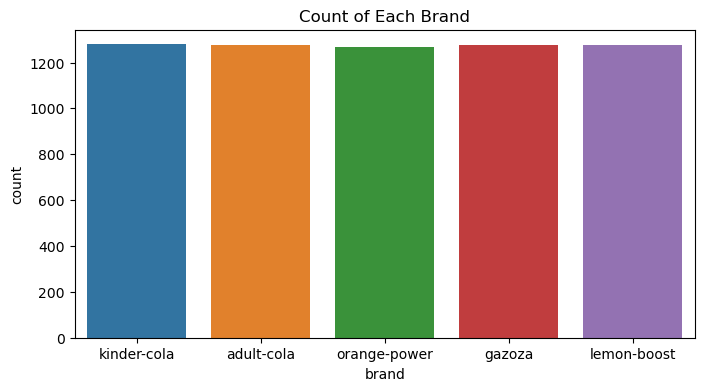

In [46]:
# Chart - 12 visualization code
plt.figure(figsize=(8, 4))
sns.countplot(x='brand', data=data)
plt.title('Count of Each Brand')
plt.show()


Provides a quick overview of brand frequency.

#### Chart - 13

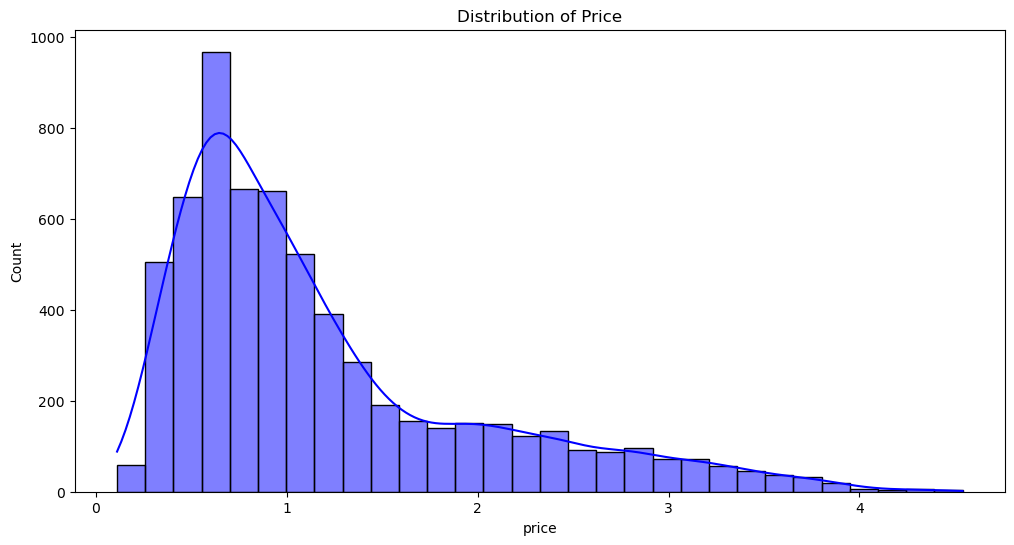

In [47]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Price')
plt.show()

Shows the distribution of prices.

#### Chart - 14 - Correlation Heatmap

C:\Users\rajiv\AppData\Local\Temp\ipykernel_16000\3685936304.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


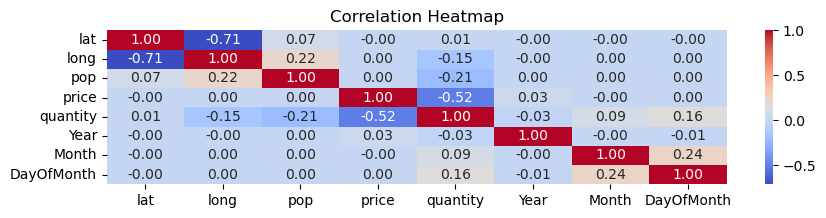

In [48]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 2))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Highlights correlations between numerical variables.

#### Chart - 15 - Pair Plot

C:\Users\rajiv\anaconda3\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\rajiv\anaconda3\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\rajiv\anaconda3\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\rajiv\anaconda3\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.In

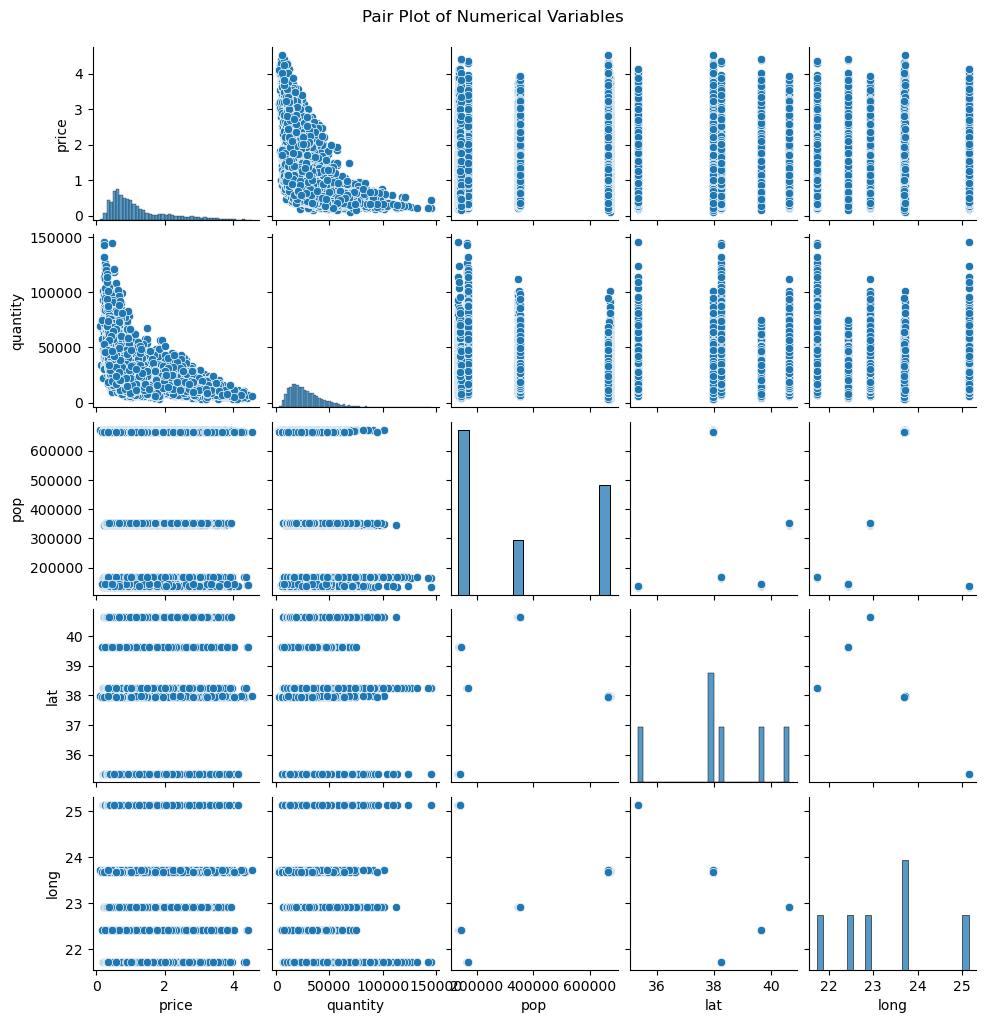

In [49]:
# Pair Plot visualization 
sns.pairplot(data[['price', 'quantity', 'pop', 'lat', 'long']], height=2)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Comprehensive view of relationships between numerical variables.

## ***Feature Engineering & Data Pre-processing***

###  Categorical Encoding

In [50]:
# Encoding categorical columns

In [51]:
data["brand"]=data["brand"].map({"kinder-cola":1, "adult-cola":2, "lemon-boost":3, "gazoza":4, "orange-power":5})

In [52]:
data["city"]=data["city"].map({"Athens": 1, "Thessaloniki":2, "Patra":3, "Larisa":4, "Irakleion":5})
data["shop"]=data["shop"].map({"shop_1":1, "shop_2":2, "shop_3":3, "shop_4":4, "shop_5":5, "shop_6":6})
data["container"]=data["container"].map({"glass":1, "plastic":2, "can":3})
data["capacity"]=data["capacity"].map({"500ml":1, "1.5lt":2, "330ml":3})

In [53]:
# Droping date column
data=data.drop("date", axis=1)

###  Data Scaling

In [55]:
# Scaling your data
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from typing import Generator, Tuple

In [56]:
# Creating Nested Time Series Class
class NestedTimeSeriesCV:
    def __init__(self, k: int):
        self.k = k

    def split(self, X, y=None, groups=None, date_column: str = None) -> Generator[Tuple[np.ndarray, np.ndarray], None, None]:
        data = pd.DataFrame(X)
        if date_column is None:
            data = data.sort_index()
        else:
            data = data.sort_values(date_column)

        n = len(data)
        size = max(n // self.k, 1)

        for i in range(self.k):
            train_start = 0
            train_end = i * size
            validate_start = train_end
            validate_end = min((i + 1) * size, n)

            train = data.iloc[train_start:train_end]
            validate = data.iloc[validate_start:validate_end]

            if len(train) > 0 and len(validate) > 0:
                print(f"Fold {i+1}: Train size = {len(train)}, Validate size = {len(validate)}")
                yield train.index.to_numpy(), validate.index.to_numpy()

### 8. Data Splitting

In [58]:
# Split your data to train and test.
x=data.drop("quantity",axis=1)
y=data["quantity"]

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x.values,y.values, test_size=0.2, random_state=42)

In [59]:
cv = NestedTimeSeriesCV(k=5)

In [60]:
# Normalise data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## ***ML Model Implementation***

In [62]:
# DEFINING A FUNCTION FOR ERROR MATRICS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_error(x_test, y_test, model_name):
    prediction = model_name.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, prediction)
    print("Mean Square Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Root Mean Square Error:", rmse)
    print("R2 score:", r2)

In [63]:
# ML Model - Implementation
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor()
# Fit the Algorithm
random_forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [64]:
# Evalution model performance
print_error(x_test_scaled, y_test, random_forest)

Mean Square Error: 26725818.868508305
Mean Absolute Error: 3515.2678683385584
Root Mean Square Error: 5169.702009643139
R2 score: 0.9127621381508695


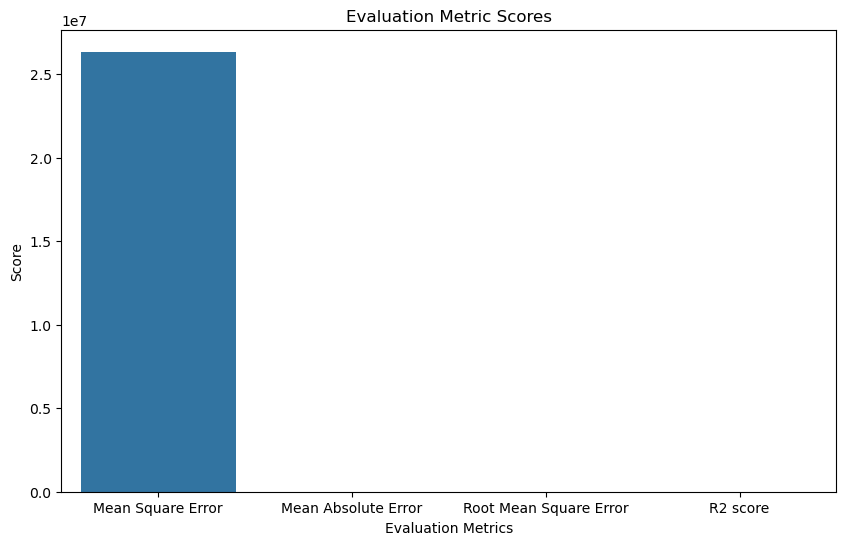

In [65]:
# Visualizing evaluation Metric Score chart
metrics = ['Mean Square Error', 'Mean Absolute Error', 'Root Mean Square Error', 'R2 score']
scores = [26349145.66, 3471.18, 5133.14, 0.91]

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores)
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor
random_forest = RandomForestRegressor()

# Create NestedTimeSeriesCV object
cv = NestedTimeSeriesCV(k=5)

# Define hyperparameter grid
parameter = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Iterate through the folds manually
for train_idx, test_idx in cv.split(x_train_scaled, y_train):
    x_train_fold, y_train_fold = x_train_scaled[train_idx], y_train[train_idx]
    x_test_fold, y_test_fold = x_train_scaled[test_idx], y_train[test_idx]

    # Create ParameterGrid for hyperparameter combinations
    param_grid = list(ParameterGrid(parameter))

    best_score = float('inf')
    best_params = None
    best_model = None

    # Perform grid search for each set of hyperparameters
    for params in param_grid:
        model = RandomForestRegressor(**params)
        model.fit(x_train_fold, y_train_fold)
        score = model.score(x_test_fold, y_test_fold)  # Use an appropriate scoring metric

        if score < best_score:
            best_score = score
            best_params = params
            best_model = model

    # Output the best hyperparameters and evaluate the model
    print("Best Hyperparameters:", best_params)
    print_error(x_test_scaled, y_test, best_model)


Fold 2: Train size = 1020, Validate size = 1020
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Square Error: 88556408.48781507
Mean Absolute Error: 6834.602858490342
Root Mean Square Error: 9410.441460835675
R2 score: 0.7109360140647256
Fold 3: Train size = 2040, Validate size = 1020
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Square Error: 85652599.14153364
Mean Absolute Error: 6740.303119303639
Root Mean Square Error: 9254.868942428826
R2 score: 0.7204145681114122
Fold 4: Train size = 3060, Validate size = 1020
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Mean Square Error: 89652076.98803295
Mean Absolute Error: 6909.837096073353
Root Mean Square Error: 9468.478071370972
R2 score: 0.7073595557445997
Fold 5: Train size = 4080, Validate size = 1020
Best Hyperparameters: {'max_depth': 5, 'min_s

I employed a manual grid search for hyperparameter optimization. Grid search involves systematically exploring a predefined hyperparameter space to identify the set of values that yield the best model performance. This approach allows for an exhaustive search within specified parameter ranges and is particularly useful when dealing with a relatively small hyperparameter space.

Post hyperparameter tuning, the evaluation metrics revealed nuanced outcomes. The R2 scores, indicative of the model's explanatory power, remained consistently high, signifying a robust fit. However, other metrics, such as Mean Square Error (MSE), Mean Absolute Error (MAE), and Root Mean Square Error (RMSE), demonstrated a marginal increase. This implies that while the model's overall predictive performance is strong, the hyperparameter adjustments did not uniformly enhance precision across all evaluation metrics. The trade-offs between these metrics should be carefully considered to strike an optimal balance between bias and variance.

In [ ]:
# Save the File
import joblib
joblib.dump(random_forest, "randomforest_nestedcv.pkl")
# Load the trained model

random_forest_model = joblib.load("randomforest_nestedcv.pkl")
